BGD converged after 7586 iterations
BGD weight vector: [-0.00557469  0.86948725  0.7807255   0.86408225  1.27900314  0.11553248
  1.56777971  1.08847718]
SGD weight vector: [-0.00417487 -0.05533824 -0.21682922 -0.21620006  0.45662344 -0.02852744
  0.19320653 -0.02174399]
Normal Equation weight vector: [-0.00557469  0.86983813  0.78109748  0.86449324  1.2792889   0.11558646
  1.56826654  1.0888816 ]
BGD test cost: 0.4340440248386965
SGD test cost: 0.4450654488548582
Normal Equation test cost: 0.4340451284327161


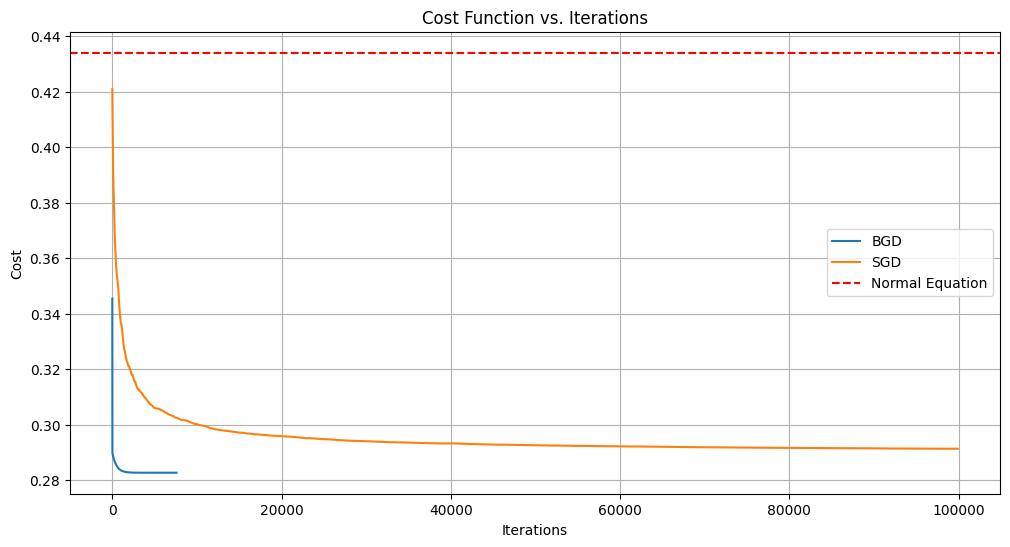

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_normalize_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1]
    
    # Compute mean and standard deviation
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Normalize the features
    X_normalized = (X - mean) / std
    
    # Add bias term (column of ones)
    X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))
    
    return X_normalized, y, mean, std

def calculate_cost(X, y, w):
    m = X.shape[0]
    h = X.dot(w)
    return np.sum((h - y)**2) / (2*m)

def batch_gradient_descent(X, y, learning_rate, max_iterations=10000, tolerance=1e-6):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    
    for i in range(max_iterations):
        h = X.dot(w)
        gradient = X.T.dot(h - y) / m
        w_new = w - learning_rate * gradient
        
        # Calculate the cost AFTER updating weights
        cost = calculate_cost(X, y, w_new)
        costs.append(cost)
        
        if np.linalg.norm(w_new - w) < tolerance:
            print(f"BGD converged after {i+1} iterations")
            return w_new, costs
        
        w = w_new
    
    print("BGD did not converge")
    return w, costs

def stochastic_gradient_descent(X, y, initial_learning_rate, num_iterations, decay_rate=0.001):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    learning_rate = initial_learning_rate
    
    for i in range(num_iterations):
        idx = np.random.randint(0, m)
        xi, yi = X[idx], y[idx]
        
        prediction = np.dot(xi, w)
        gradient = xi * (prediction - yi)
        w -= learning_rate * gradient
        
        # Decay the learning rate over time
        learning_rate = initial_learning_rate / (1 + decay_rate * i)
        
        # Calculate cost every 100 iterations to reduce computation
        if i % 100 == 0:
            cost = calculate_cost(X, y, w)
            costs.append(cost)
    
    return w, costs

def normal_equation(X, y):
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)  # Use pinv for numerical stability

# Load and normalize data
X_train, y_train, train_mean, train_std = load_and_normalize_data('train.csv')
X_test, y_test, _, _ = load_and_normalize_data('test.csv')

# Normalize test data using training mean and std
X_test[:, 1:] = (X_test[:, 1:] - train_mean) / train_std

# Batch Gradient Descent
bgd_lr = 0.5  # You may need to adjust this
bgd_w, bgd_costs = batch_gradient_descent(X_train, y_train, bgd_lr)

# Stochastic Gradient Descent
sgd_lr = 0.001  # You may need to adjust this
num_iterations = 100000
sgd_w, sgd_costs = stochastic_gradient_descent(X_train, y_train, sgd_lr, num_iterations)

# Normal Equation
ne_w = normal_equation(X_train, y_train)

print("BGD weight vector:", bgd_w)
print("SGD weight vector:", sgd_w)
print("Normal Equation weight vector:", ne_w)

# Calculate costs
bgd_test_cost = calculate_cost(X_test, y_test, bgd_w)
sgd_test_cost = calculate_cost(X_test, y_test, sgd_w)
ne_test_cost = calculate_cost(X_test, y_test, ne_w)

print(f"BGD test cost: {bgd_test_cost}")
print(f"SGD test cost: {sgd_test_cost}")
print(f"Normal Equation test cost: {ne_test_cost}")

# Plot cost functions
plt.figure(figsize=(12, 6))
plt.plot(bgd_costs, label='BGD')
plt.plot(range(0, len(sgd_costs)*100, 100), sgd_costs, label='SGD')  # Align SGD costs correctly
plt.axhline(y=ne_test_cost, color='r', linestyle='--', label='Normal Equation')
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()
